 Main Focus:

This notebook explores the time-related patterns of accidents and their severity. By analyzing when accidents happen and how severe they are, we can identify high-risk periods and factors contributing to more serious incidents.

- **Time-Related Trends:** 
    - Analyze accidents by time of day and rush hour patterns.
    - Investigate yearly trends to identify whether accident rates are increasing or decreasing over time.

- **Accident Severity and Influencing Factors:**
    - Assess the distribution of accidents by severity level (minor, moderate, severe, fatal).
    - Explore external factors such as weather, road conditions, and time of day that may correlate with higher accident severity.

<hr style="border: 1px solid #ccc; margin: 20px 0;">

In [1]:
# Data processing and manipulation
import dask.dataframe as dd                         
import pandas as pd                                 
import numpy as np                                  
import re                                           

# Visualization libraries
import matplotlib.pyplot as plt                     
from matplotlib.ticker import StrMethodFormatter     
import seaborn as sns                              

# Machine learning and preprocessing
from sklearn.preprocessing import LabelEncoder      

# Memory management
import gc                                         


<hr style="border: 1px solid #ccc; margin: 20px 0;">

•	What are the peak hours for accidents?

hour
00    112378
01     97071
02     93227
03     83863
04    159852
05    228182
06    405837
07    587472
08    577576
09    363034
10    342706
11    355040
12    355001
13    396445
14    448846
15    525855
16    581969
17    576015
18    432042
19    295121
20    225226
21    191452
22    167645
23    126539
Name: ID, dtype: int64
Total unique accidents: 7728394


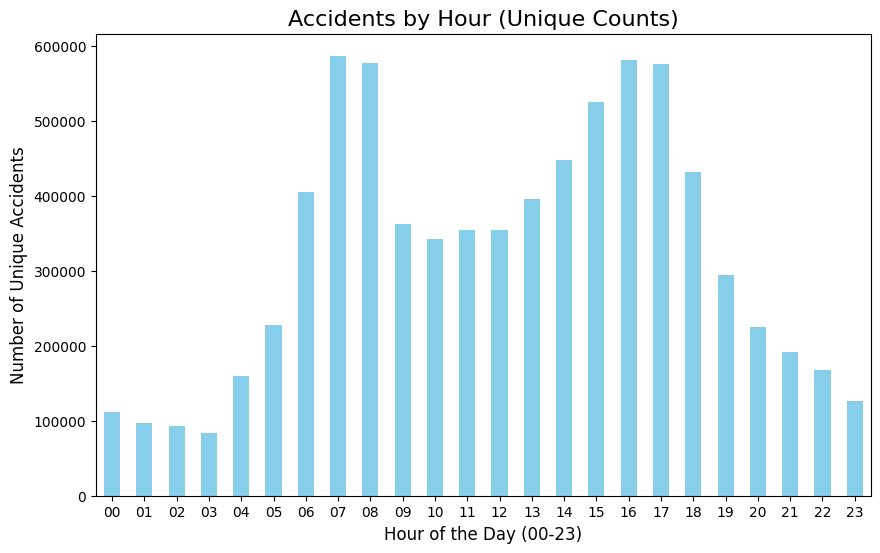

In [2]:
df = dd.read_parquet('/Users/er/Desktop/Data Analysis/Projects/Python/US Accidents/USTrafficAccidents/Data/Parquet/US_Accidents_March23.parquet') 

df['hour'] = df['Start_Time'].str.slice(11, 13)

hourly_unique_counts = df.groupby('hour')['ID'].nunique().compute()

hourly_unique_counts_sorted = hourly_unique_counts.sort_index(ascending=True)

print(hourly_unique_counts_sorted)

total_unique_counts = hourly_unique_counts_sorted.sum()
print("Total unique accidents:", total_unique_counts)

plt.figure(figsize=(10, 6))
hourly_unique_counts_sorted.plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Accidents by Hour (Unique Counts)', fontsize=16)
plt.xlabel('Hour of the Day (00-23)', fontsize=12)
plt.ylabel('Number of Unique Accidents', fontsize=12)

# Show the plot
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()


<hr style="border: 1px solid #ccc; margin: 20px 0;">

•	Is there a pattern of accidents during rush hours (morning and evening)?

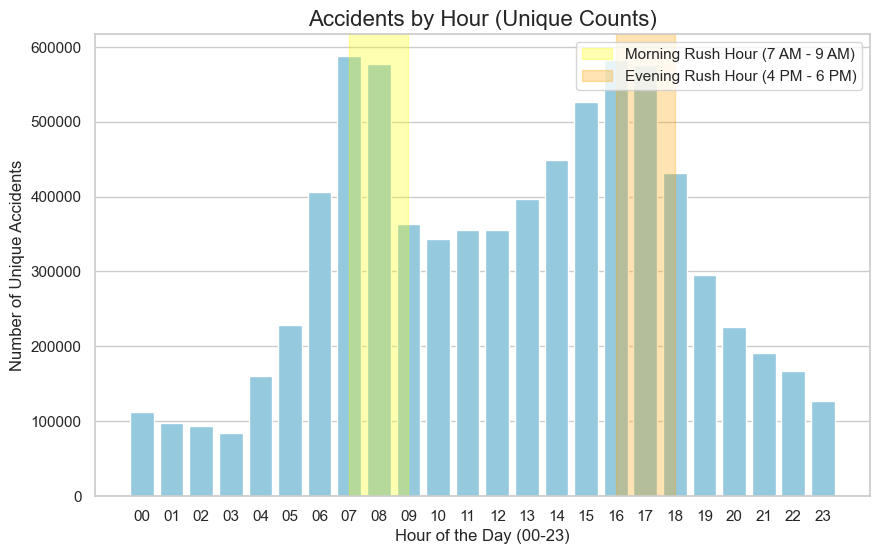

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn style
sns.set(style='whitegrid')

# Create a bar plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_unique_counts_sorted.index, y=hourly_unique_counts_sorted.values, color='skyblue')

# Adding titles and labels
plt.title('Accidents by Hour (Unique Counts)', fontsize=16)
plt.xlabel('Hour of the Day (00-23)', fontsize=12)
plt.ylabel('Number of Unique Accidents', fontsize=12)

# Highlight morning rush hour (7 AM to 9 AM)
plt.axvspan(7, 9, color='yellow', alpha=0.3, label='Morning Rush Hour (7 AM - 9 AM)')

# Highlight evening rush hour (4 PM to 6 PM)
plt.axvspan(16, 18, color='orange', alpha=0.3, label='Evening Rush Hour (4 PM - 6 PM)')

# Add a legend to explain the shaded areas
plt.legend()

# Show the plot
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()

<hr style="border: 1px solid #ccc; margin: 20px 0;">

•	How do accidents change over the course of a year?

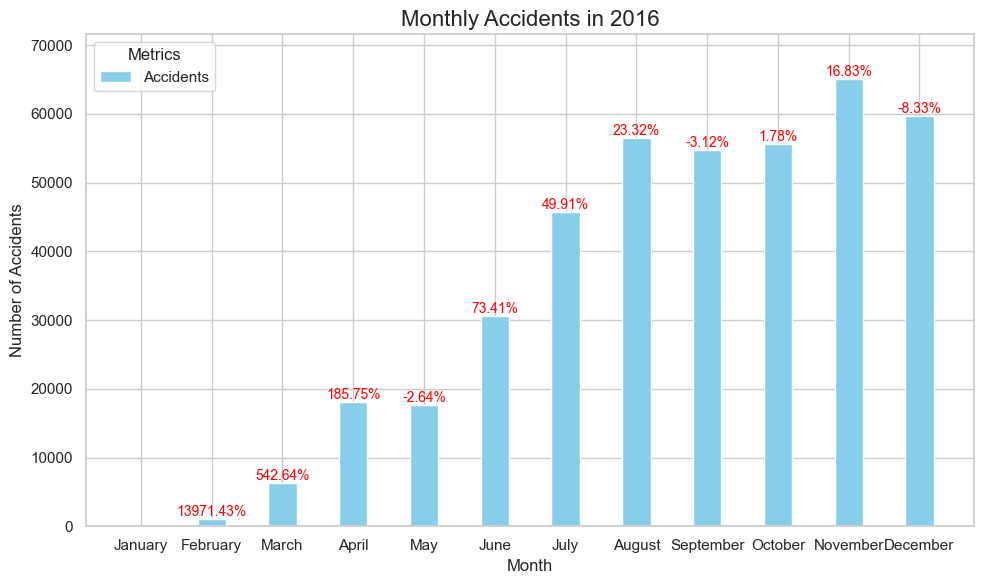

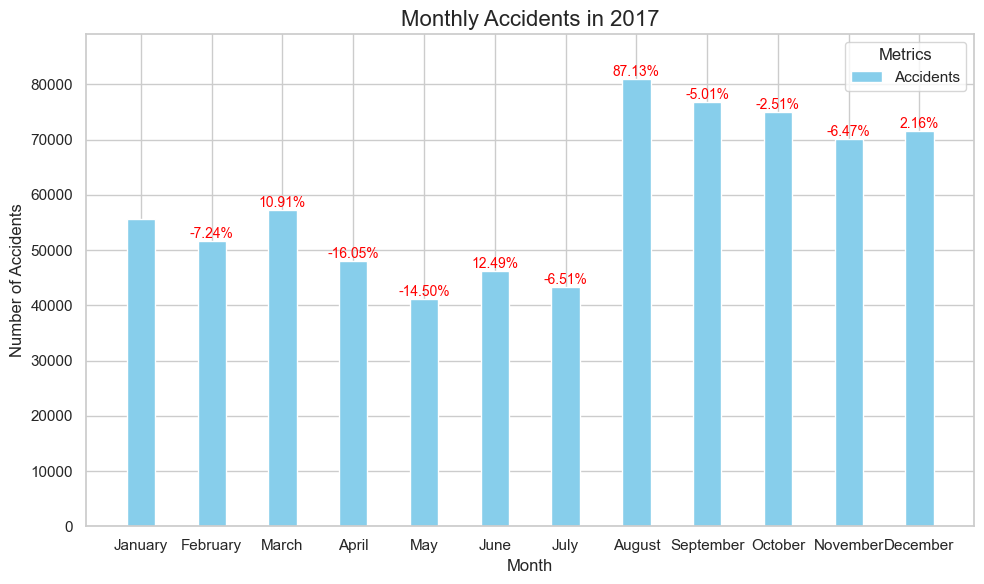

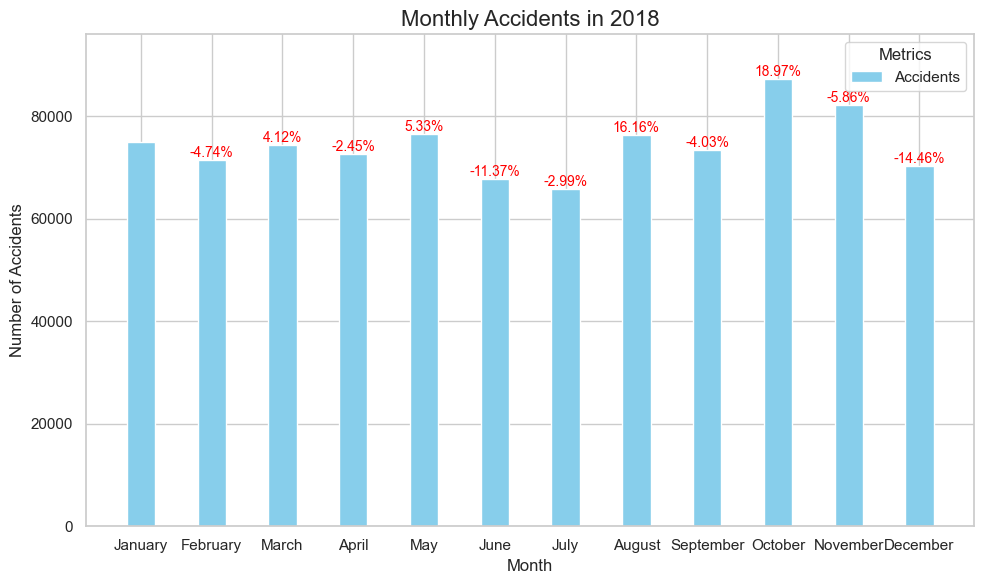

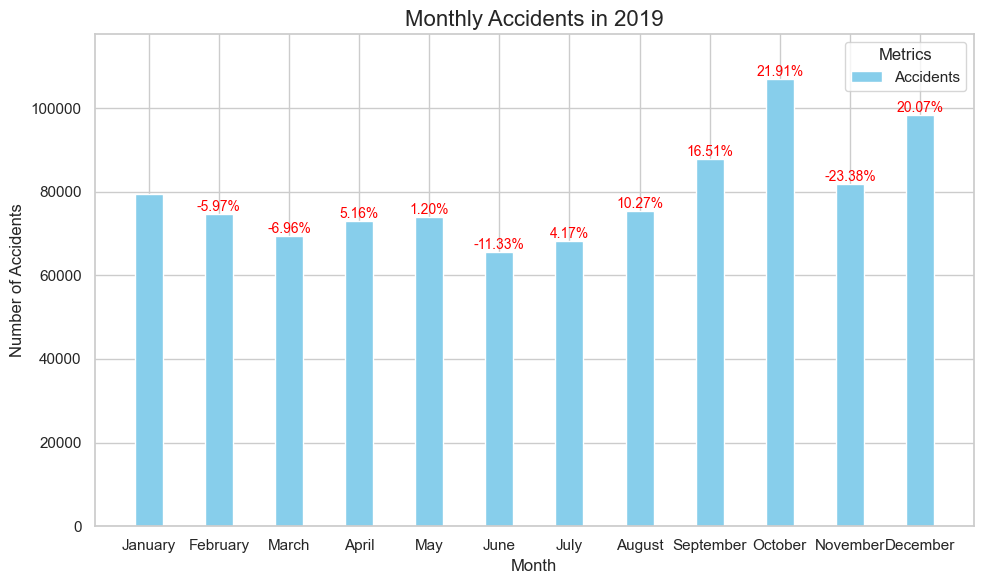

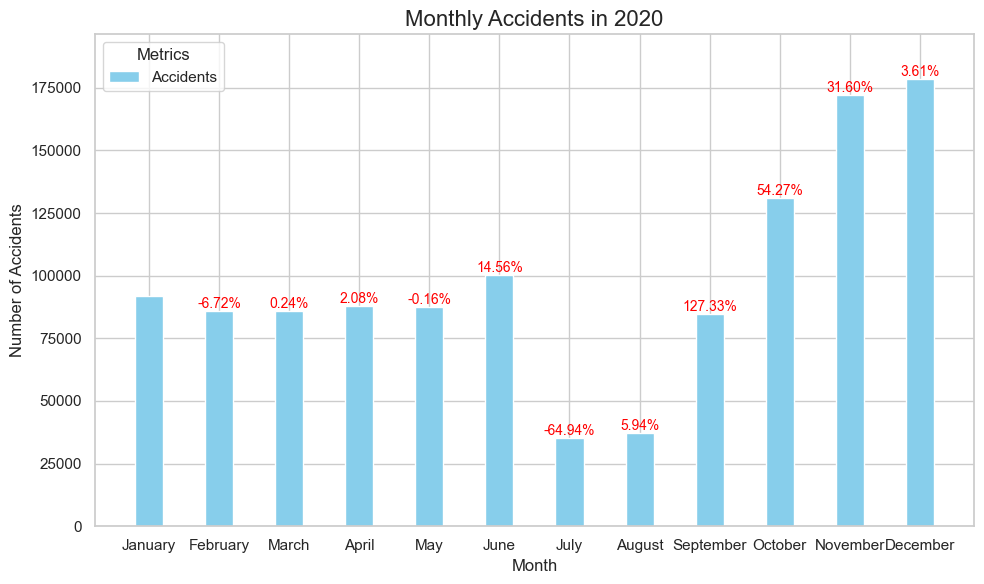

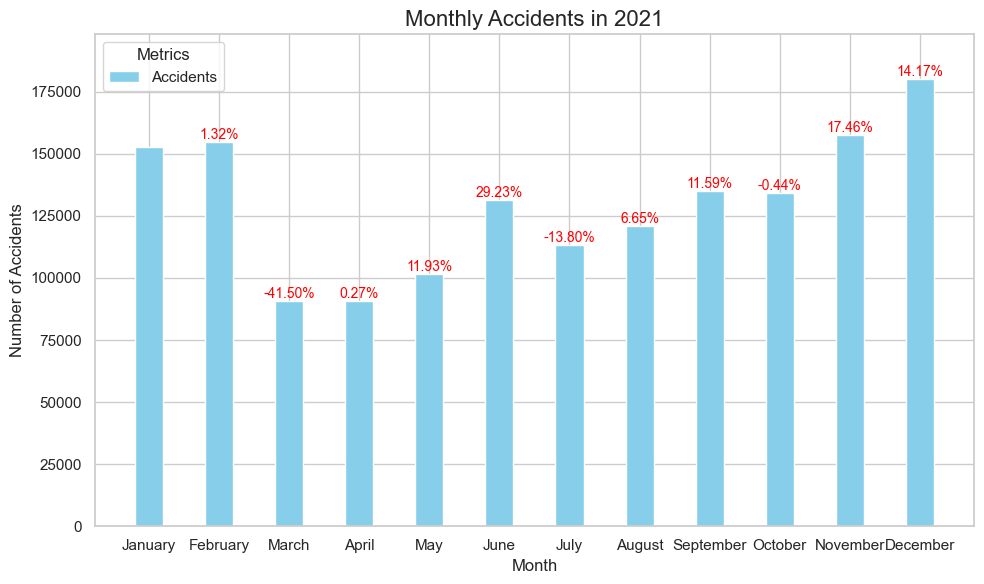

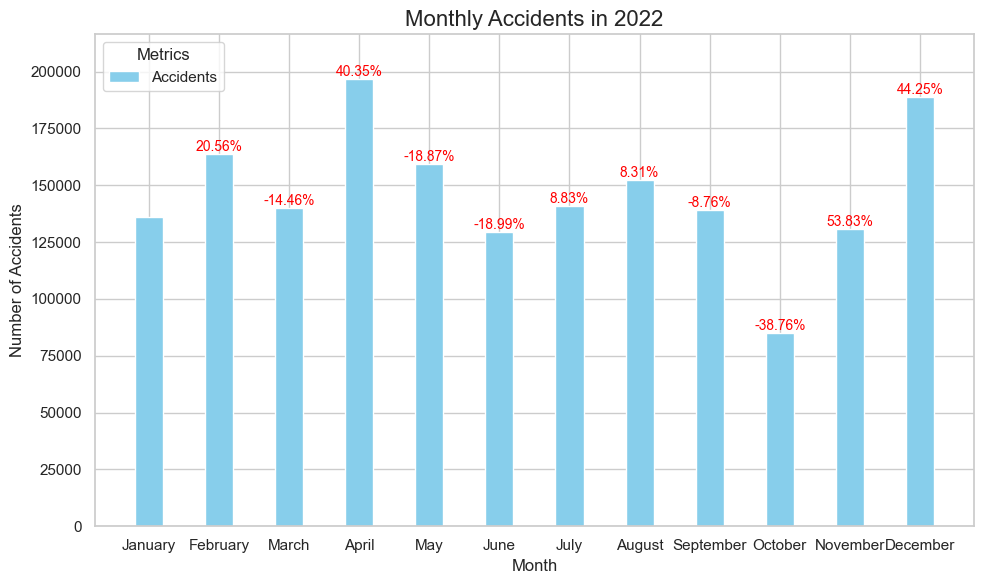

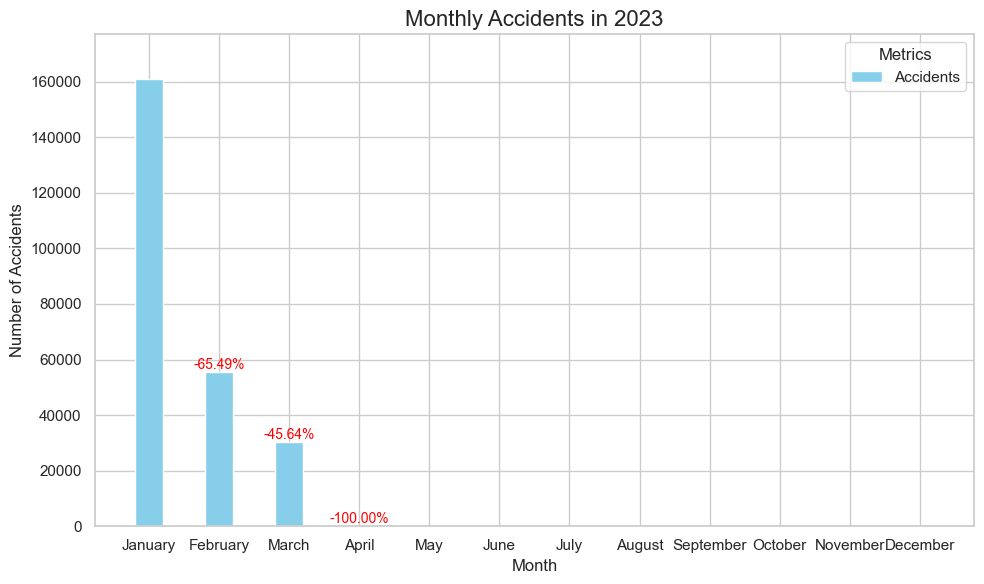

In [4]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your Dask DataFrame with 'Start_Time' column
# List of years
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

months = [
    'January',
    'February',
    'March',
    'April',
    'May',
    'June',
    'July',
    'August',
    'September',
    'October',
    'November',
    'December'
]

# Initialize a dictionary to hold values for each month across the years
monthly_trends = {year: {month: 0 for month in months} for year in years}

# For loop to count occurrences for each month across all years
for year in years:
    for month in range(1, 13):
        year_month = f"{year}-{str(month).zfill(2)}"  # Format as 'YYYY-MM'
        count = df['Start_Time'].str.contains(year_month).sum().compute()
        
        # Store the count in the corresponding year and month
        monthly_trends[year][months[month - 1]] = count

# Set up the bar chart for each year
for year in years:
    counts = [monthly_trends[year][month] for month in months]
    
    # Calculate percentage changes for the current year
    percentage_changes = [0]  # No change for the first month
    for i in range(1, len(counts)):
        if counts[i-1] != 0:  # Avoid division by zero
            percentage_change = ((counts[i] - counts[i-1]) / counts[i-1]) * 100
        else:
            percentage_change = float('nan')  # Use NaN for the first month (or handle differently)
        percentage_changes.append(percentage_change)

    # Plotting
    plt.figure(figsize=(10, 6))
    x = np.arange(len(months))  # The x locations for the groups
    bar_width = 0.4  # Width of the bars

    plt.bar(x, counts, width=bar_width, color='skyblue', label='Accidents')
    plt.title(f"Monthly Accidents in {year}", fontsize=16)
    plt.xlabel("Month", fontsize=12)
    plt.ylabel("Number of Accidents", fontsize=12)
    plt.xticks(x, months)  # Set month labels
    plt.ylim(0, max(counts) * 1.1)  # Set y-limit for better visualization
    plt.legend(title='Metrics')

    # Adding percentage change annotations
    for month_index in range(1, len(months)):
        if counts[month_index - 1] != 0:  # Avoid division by zero
            plt.annotate(f"{percentage_changes[month_index]:.2f}%", 
                         xy=(x[month_index], counts[month_index]), 
                         ha='center', 
                         va='bottom', 
                         color='red', fontsize=10)

    plt.tight_layout()
    plt.show()

<hr style="border: 1px solid #ccc; margin: 20px 0;">

•	What is the distribution of accidents by severity levels (minor, moderate, severe, fatal)?

Severity
3    1299337
1      67366
2    6156981
4     204710
Name: count, dtype: int64
7728394


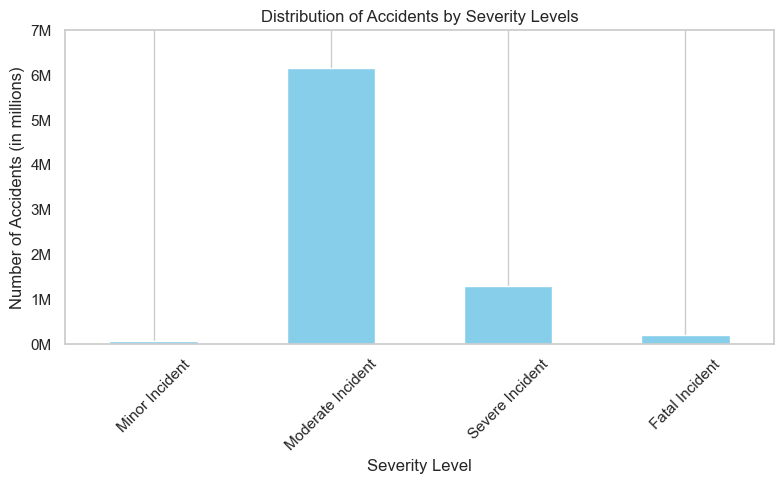

In [5]:
# Group by severity level

# Load the dataset
df = dd.read_parquet('/Users/er/Desktop/Data Analysis/Projects/Python/US Accidents/USTrafficAccidents/Data/Parquet/US_Accidents_March23.parquet')  

severity_counts = df['Severity'].value_counts().compute()
total_severity = severity_counts.sum()

print(severity_counts)
print(total_severity)

# Get the counts of each severity level
severity_counts = df['Severity'].value_counts().compute()

# Map severity numbers to descriptive names
severity_labels = {
    1: 'Minor Incident',
    2: 'Moderate Incident',
    3: 'Severe Incident',
    4: 'Fatal Incident',
}

# Update index to descriptive names
severity_counts.index = severity_counts.index.map(severity_labels)

# Create a categorical index with the specified order
ordered_severity = ['Minor Incident', 'Moderate Incident', 'Severe Incident', 'Fatal Incident']
severity_counts = severity_counts.reindex(ordered_severity)

# Adjust the scale (convert counts to millions)
severity_counts_millions = severity_counts / 1_000_000

# Plot the distribution
plt.figure(figsize=(8, 5))
severity_counts_millions.plot(kind='bar', color='skyblue')
plt.title('Distribution of Accidents by Severity Levels')
plt.xlabel('Severity Level')
plt.ylabel('Number of Accidents (in millions)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Set y-ticks for better readability
plt.yticks([i for i in range(0, int(severity_counts_millions.max()) + 2)], 
           [f'{i}M' for i in range(0, int(severity_counts_millions.max()) + 2)])

# Show the plot
plt.tight_layout()
plt.show()


<hr style="border: 1px solid #ccc; margin: 20px 0;">

•	What factors (e.g., weather, road conditions, time of day) seem to correlate with higher accident severity?

Correlation Matrix for Severity Level 1:
                   Severity  Temperature(F)  Humidity(%)  Wind_Speed(mph)  \
Severity                NaN             NaN          NaN              NaN   
Temperature(F)          NaN        1.000000    -0.288157        -0.031746   
Humidity(%)             NaN       -0.288157     1.000000        -0.205287   
Wind_Speed(mph)         NaN       -0.031746    -0.205287         1.000000   
Precipitation(in)       NaN       -0.000622     0.081820         0.026067   
Distance(mi)            NaN       -0.025354     0.012569         0.036061   
Traffic_Signal          NaN        0.029288    -0.044182         0.018568   

                   Precipitation(in)  Distance(mi)  Traffic_Signal  
Severity                         NaN           NaN             NaN  
Temperature(F)             -0.000622     -0.025354        0.029288  
Humidity(%)                 0.081820      0.012569       -0.044182  
Wind_Speed(mph)             0.026067      0.036061        0.018568

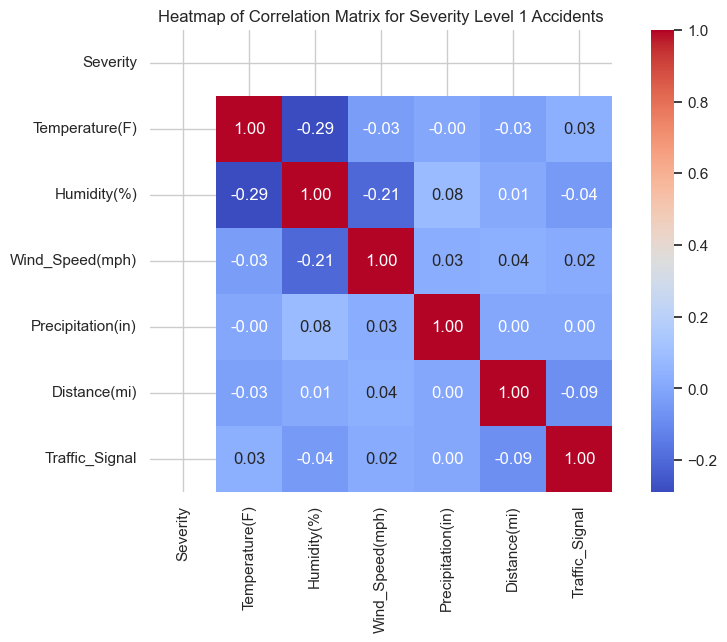

        Severity  Temperature(F)  Humidity(%)  Wind_Speed(mph)  \
14035          4            63.0         70.0             13.8   
58391          4            59.0         93.0              5.8   
133648         4            89.1         63.0             12.7   
135764         4            75.0         94.0             17.3   
140384         4            80.1         85.0             10.4   

        Precipitation(in)  Distance(mi)  Traffic_Signal  
14035                0.00          0.01           False  
58391                0.01          0.01           False  
133648               0.00          0.00           False  
135764               0.27          0.00           False  
140384               0.00          0.00           False  
Number of rows with Severity level 1: 132126


In [6]:
import dask.dataframe as dd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = dd.read_parquet('/Users/er/Desktop/Data Analysis/Projects/Python/US Accidents/USTrafficAccidents/Data/Parquet/US_Accidents_March23.parquet')

# Select relevant columns for analysis
columns_of_interest = [
    'Severity', 
    'Temperature(F)', 
    'Humidity(%)', 
    'Wind_Speed(mph)', 
    'Precipitation(in)', 
    'Distance(mi)',         
    'Traffic_Signal',        
]

# Filter the DataFrame to include only relevant columns
df_filtered = df[columns_of_interest]

# Drop rows with NaN values in the selected columns
df_filtered = df_filtered.dropna()

# Filter the DataFrame to include only rows where Severity equals 4
df_severity_1 = df_filtered[df_filtered['Severity']==4]

# Compute the filtered Dask DataFrame to convert it to a Pandas DataFrame
df_severity_1 = df_severity_1.compute()

# Calculate the correlation matrix for the filtered DataFrame
correlation_matrix = df_severity_1.corr()

# Print the correlation matrix
print("Correlation Matrix for Severity Level 1:")
print(correlation_matrix)

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title('Heatmap of Correlation Matrix for Severity Level 1 Accidents')
plt.show()

# Print the first few rows (now a Pandas DataFrame)
print(df_severity_1.head())

# Print the number of rows in the filtered DataFrame for Severity 1
print(f"Number of rows with Severity level 1: {df_severity_1.shape[0]}")

<hr style="border: 1px solid #ccc; margin: 20px 0;">